In [23]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import Spectra_generator, Spectra_interpolation, Flux_generator, J_interpolation, Flux_interpolation, Signal_PDF
from scipy.interpolate import splrep, splev
from ipynb.fs.full.func_plot_histo import plot_projections

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


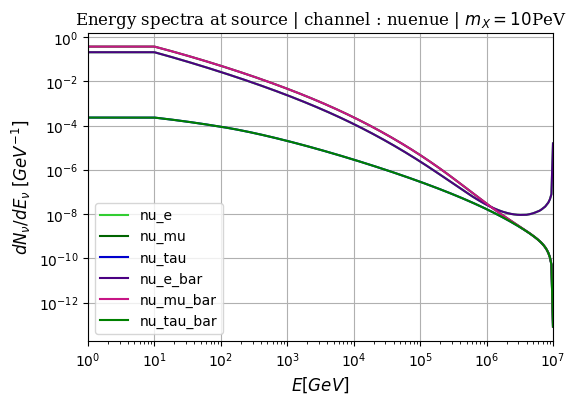

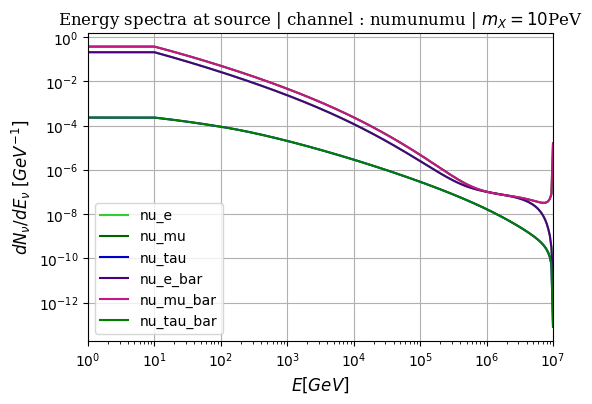

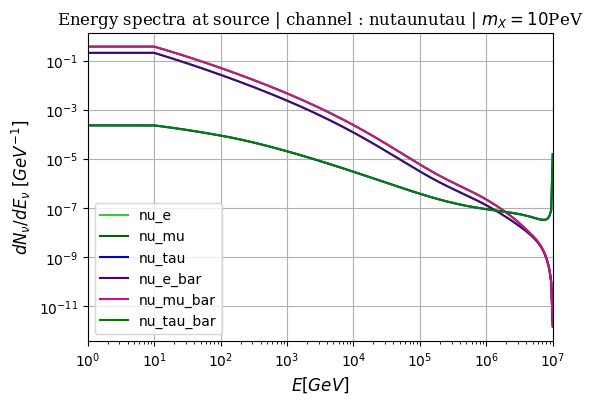

In [24]:
Flux_nue = Spectra_generator(mass = 1e7, channel = 'nuenue', process='ann')
Flux_numu = Spectra_generator(mass = 1e7, channel = 'numunumu', process='ann')
Flux_nutau = Spectra_generator(mass = 1e7, channel = 'nutaunutau', process='ann')

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


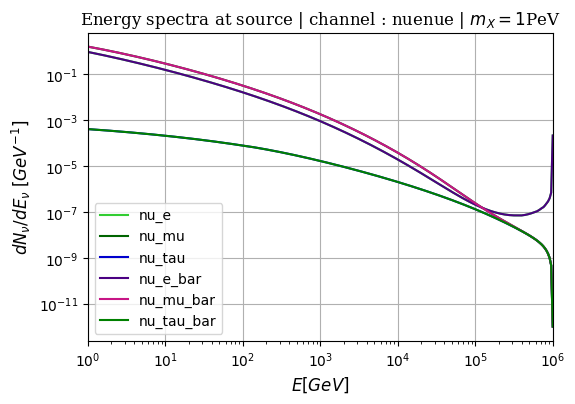

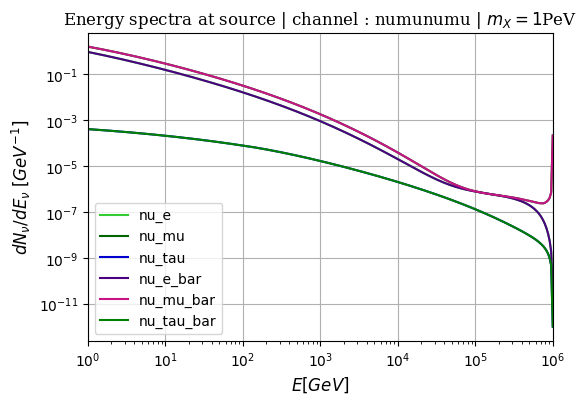

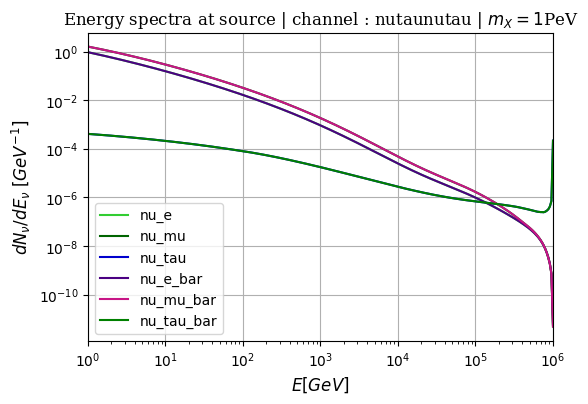

In [25]:
Flux_nue1 = Spectra_generator(mass = 1e6, channel = 'nuenue', process='ann')
Flux_numu1 = Spectra_generator(mass = 1e6, channel = 'numunumu', process='ann')
Flux_nutau1 = Spectra_generator(mass = 1e6, channel = 'nutaunutau', process='ann')

In [26]:
resp_matrix_data = np.load('Response matrix/Resp_MC1122_logE.pkl',allow_pickle=True, encoding="latin1")

In [27]:
resp_matrix_data.keys()

dict_keys(['Bin', 'Resp', 'Resp_Scr'])

In [28]:
Resp = resp_matrix_data['Resp']

In [29]:
Resp['nu_tau'].shape

(100, 300, 18, 50)

In [30]:
Reco_mass_range = resp_matrix_data['Bin'].keys()

In [31]:
True_energy_center = resp_matrix_data['Bin']['true_energy_center']
True_psi_center = resp_matrix_data['Bin']['true_psi_center']
Reco_energy_center = resp_matrix_data['Bin']['reco_energy_center']
Reco_psi_center = resp_matrix_data['Bin']['reco_psi_center']

nu_flavor = ['nu_e','nu_mu','nu_tau','nu_e_bar','nu_mu_bar','nu_tau_bar']

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


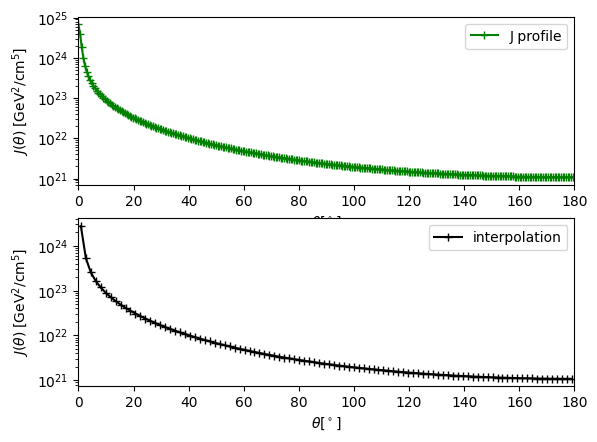

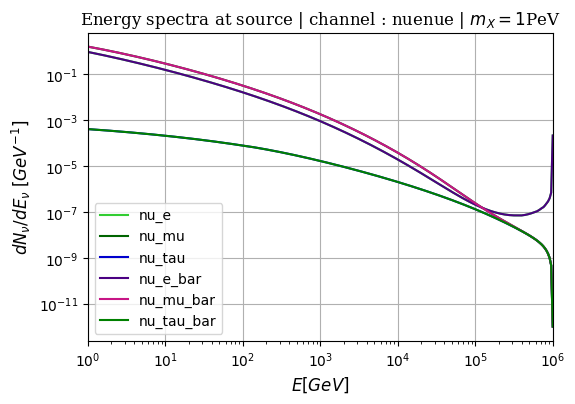

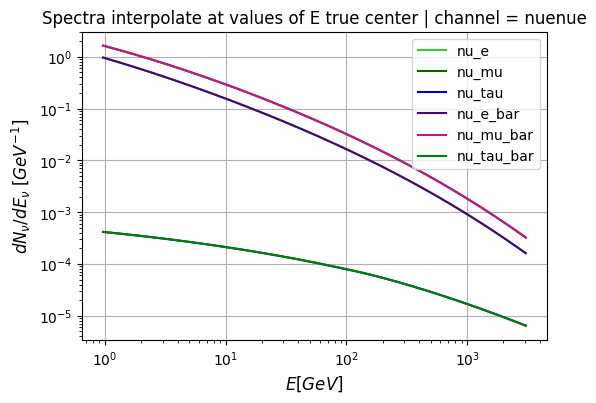

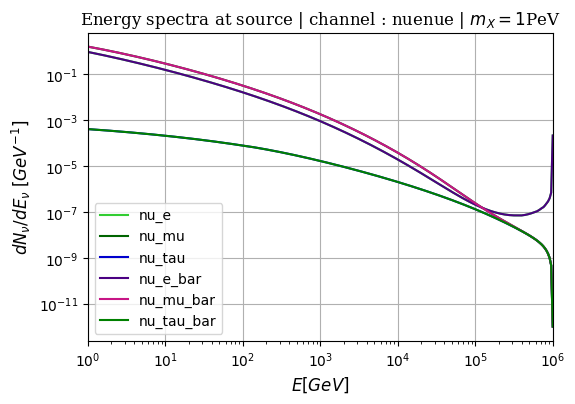

In [32]:
True_flux_nue1 = Flux_interpolation(mass=1e6,channel='nuenue',process='ann', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


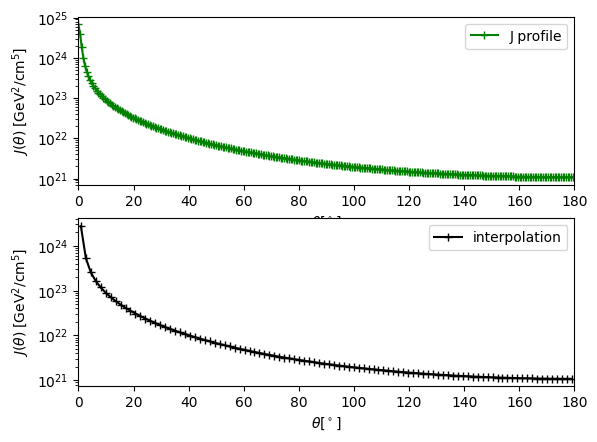

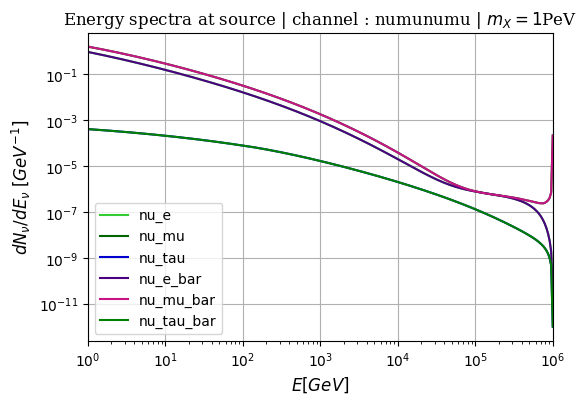

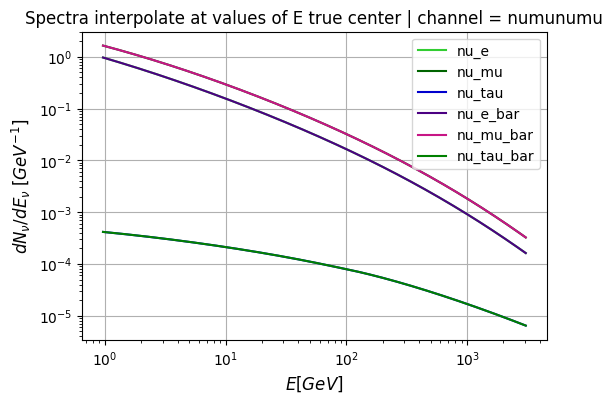

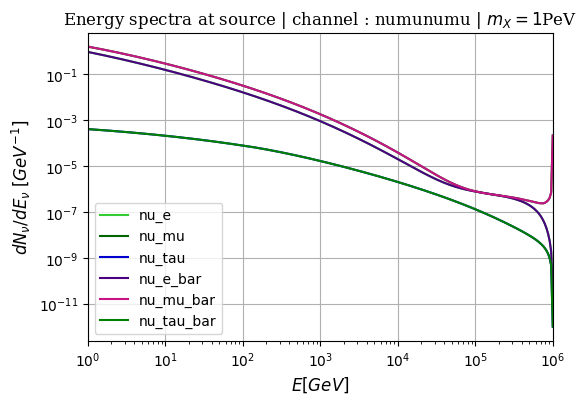

In [33]:
True_flux_numu1 = Flux_interpolation(mass=1e6,channel='numunumu',process='ann', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


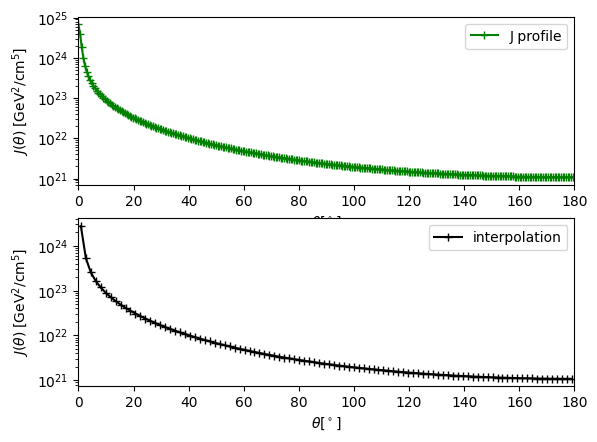

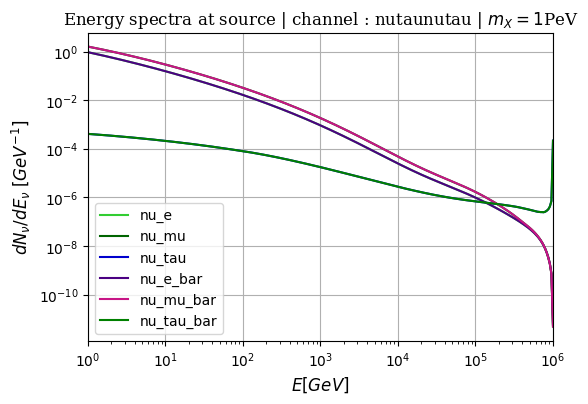

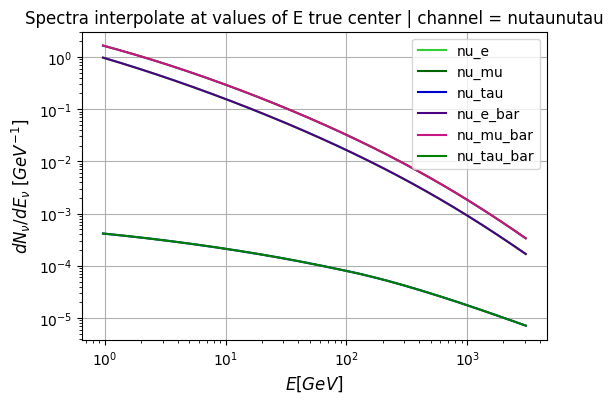

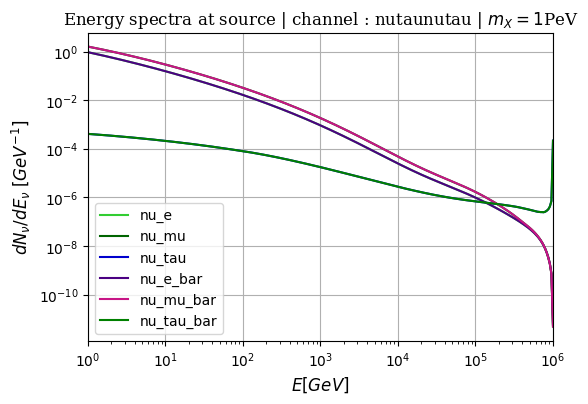

In [34]:
True_flux_nutau1 = Flux_interpolation(mass=1e6,channel='nutaunutau',process='ann', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


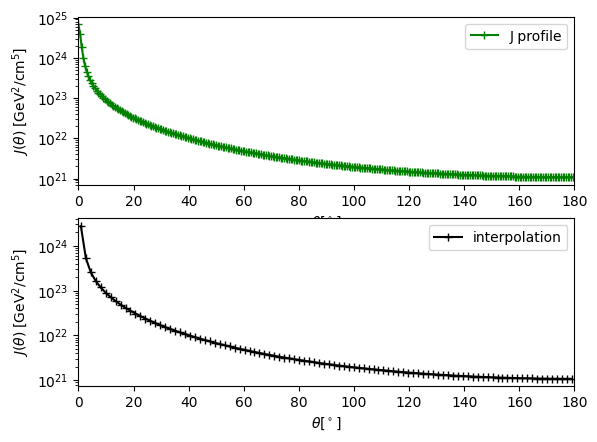

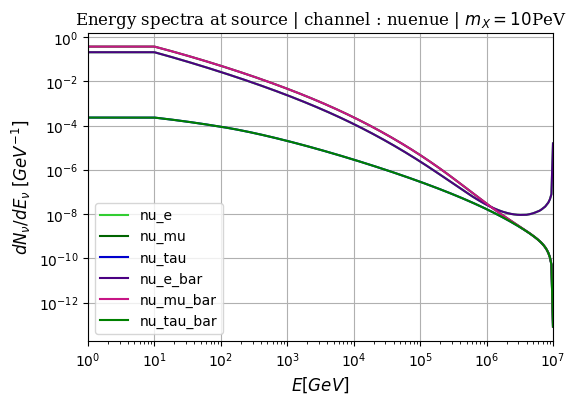

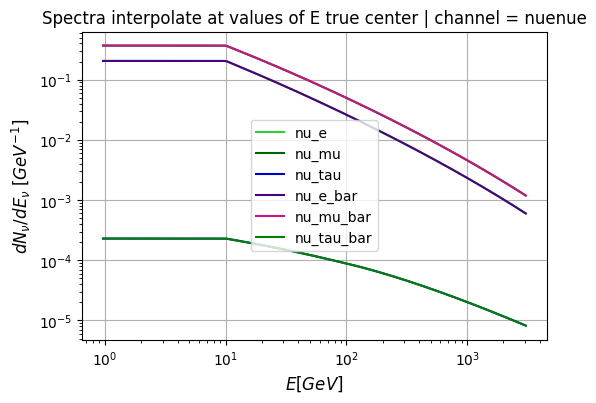

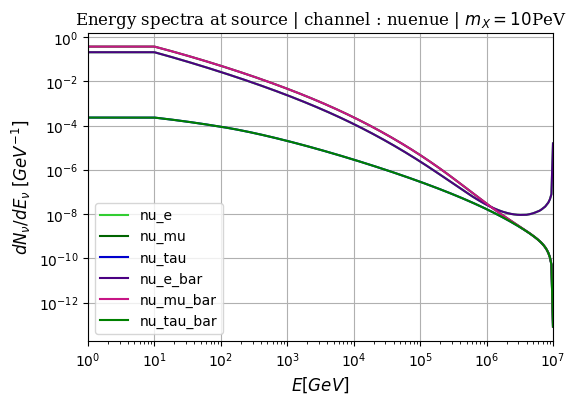

In [35]:
True_flux_nue = Flux_interpolation(mass=1e7,channel='nuenue',process='ann', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


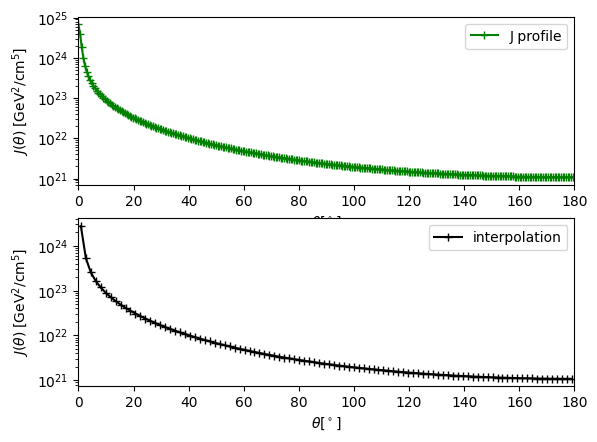

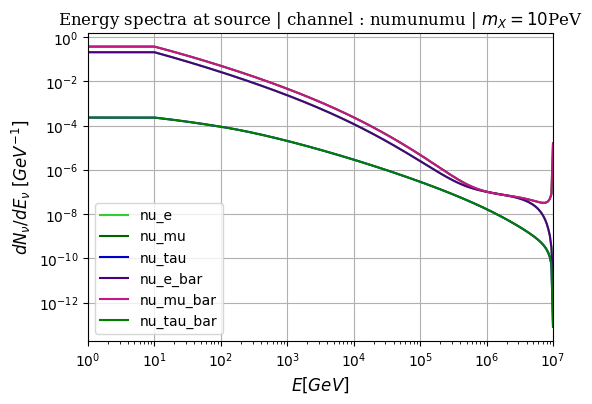

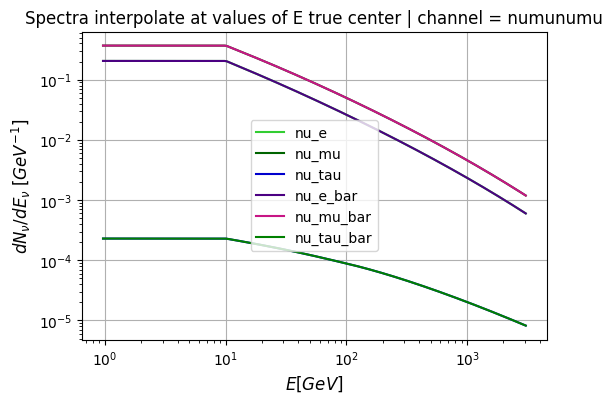

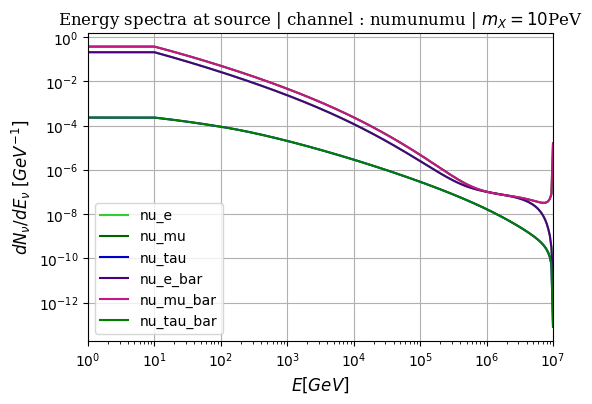

In [36]:
True_flux_numu = Flux_interpolation(mass=1e7,channel='numunumu',process='ann', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


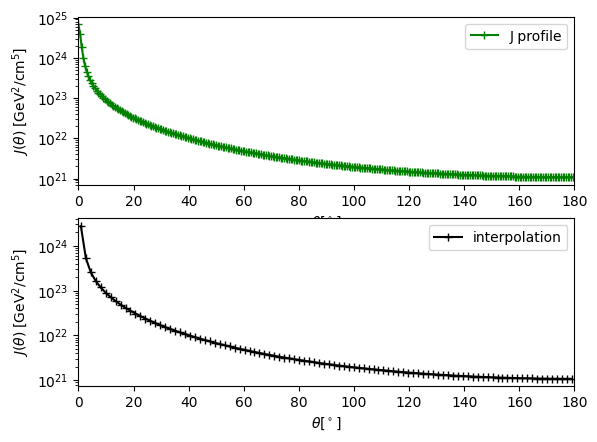

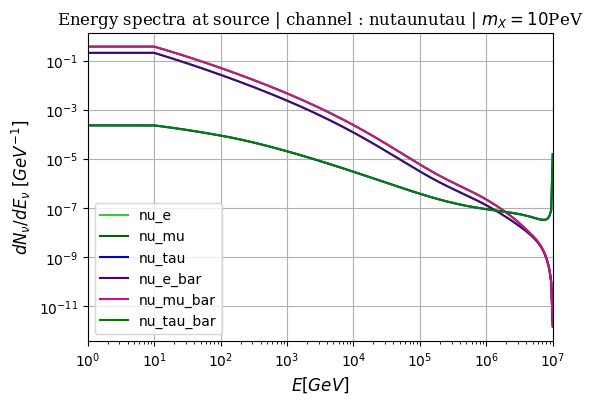

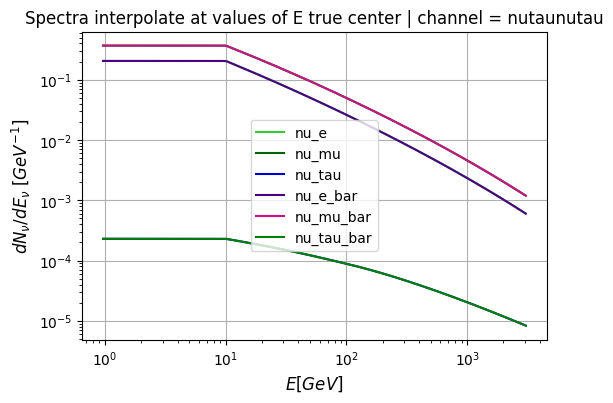

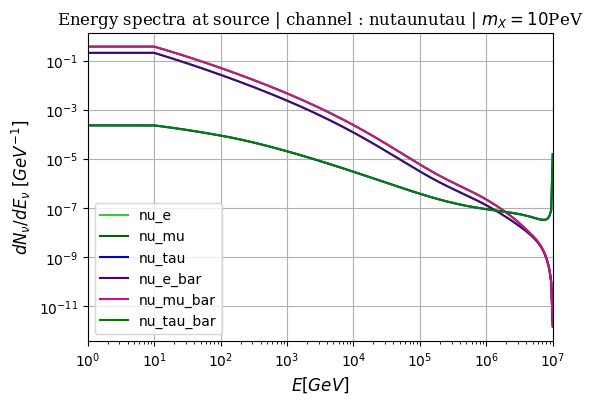

In [37]:
True_flux_nutau = Flux_interpolation(mass=1e7,channel='nutaunutau',process='ann', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

In [38]:
theta = np.linspace(0.,np.pi,100)
mass_range = Flux_nue.iniE()
theta_edges = np.histogram_bin_edges(theta,bins=len(theta))
mass_range_edges = np.histogram_bin_edges(mass_range,bins=len(mass_range))
Reco_mass_edges = np.histogram_bin_edges(Reco_energy_center,bins=len(Reco_energy_center))
Reco_theta_edges = np.histogram_bin_edges(Reco_psi_center,bins=len(Reco_psi_center))

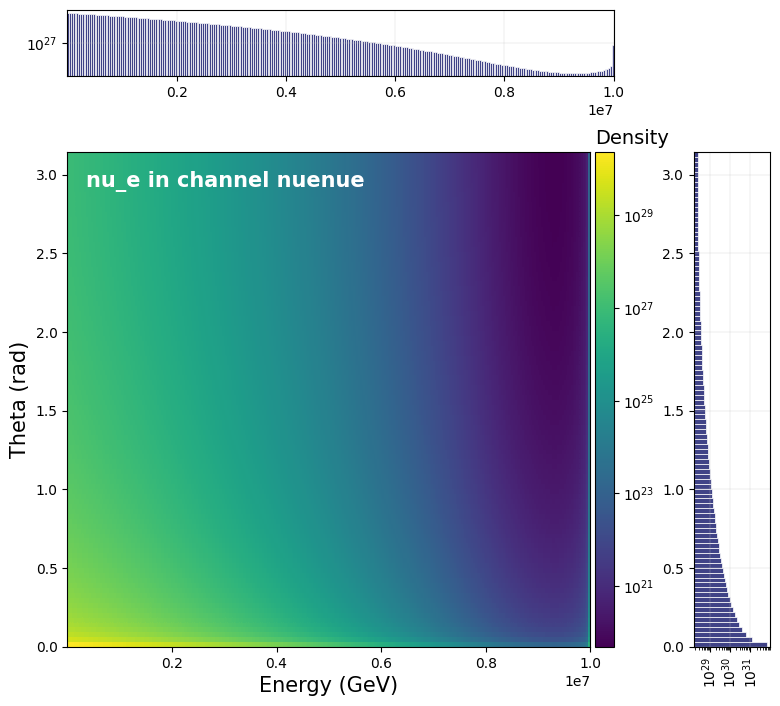

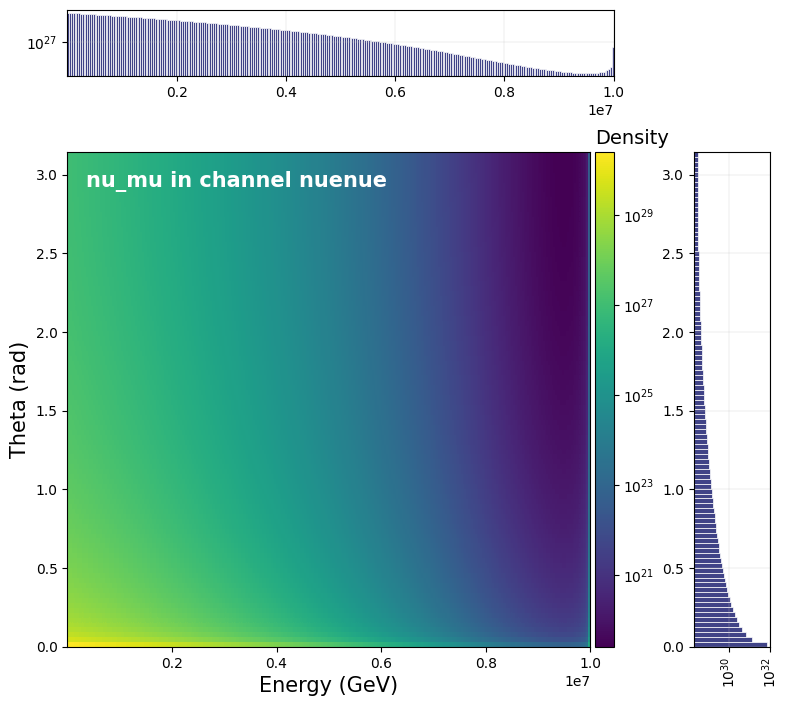

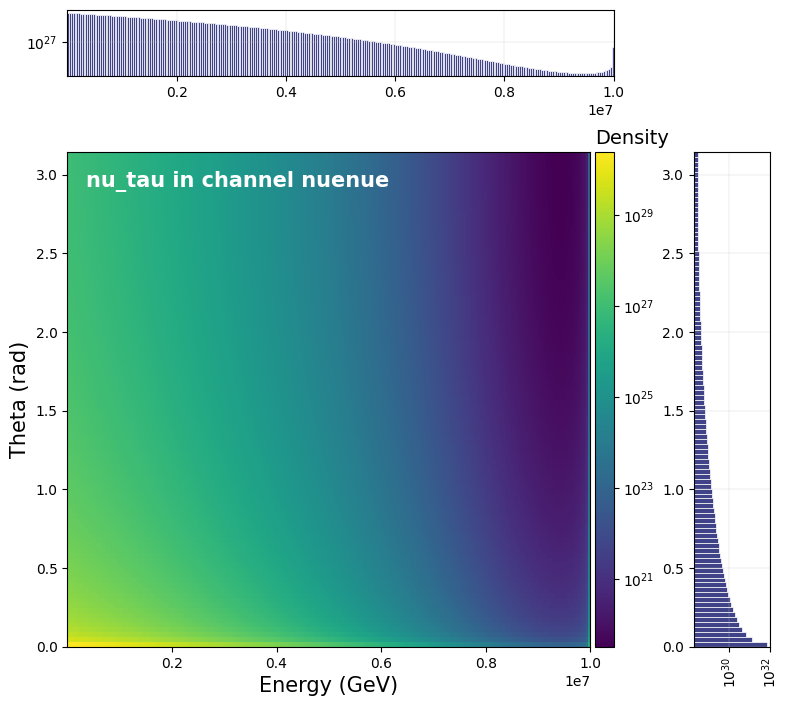

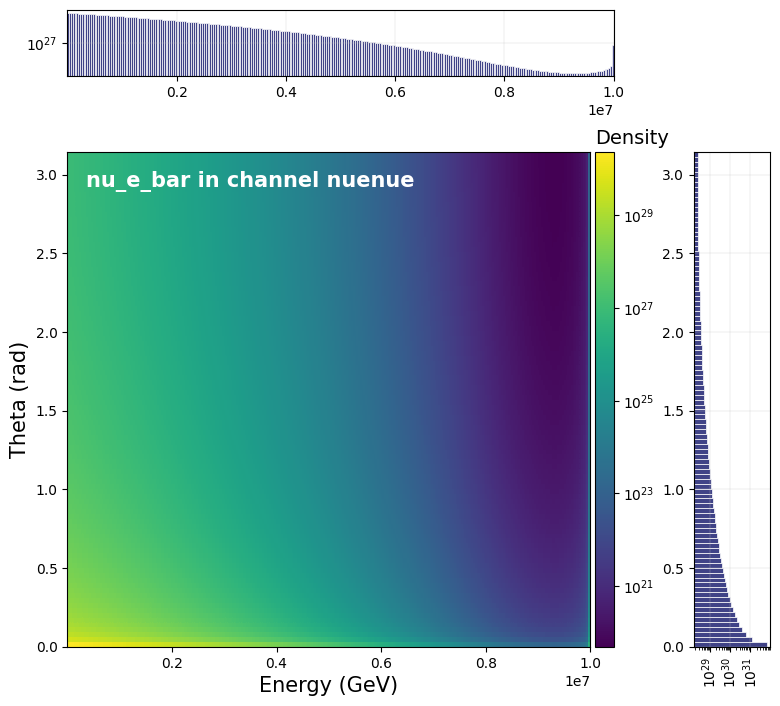

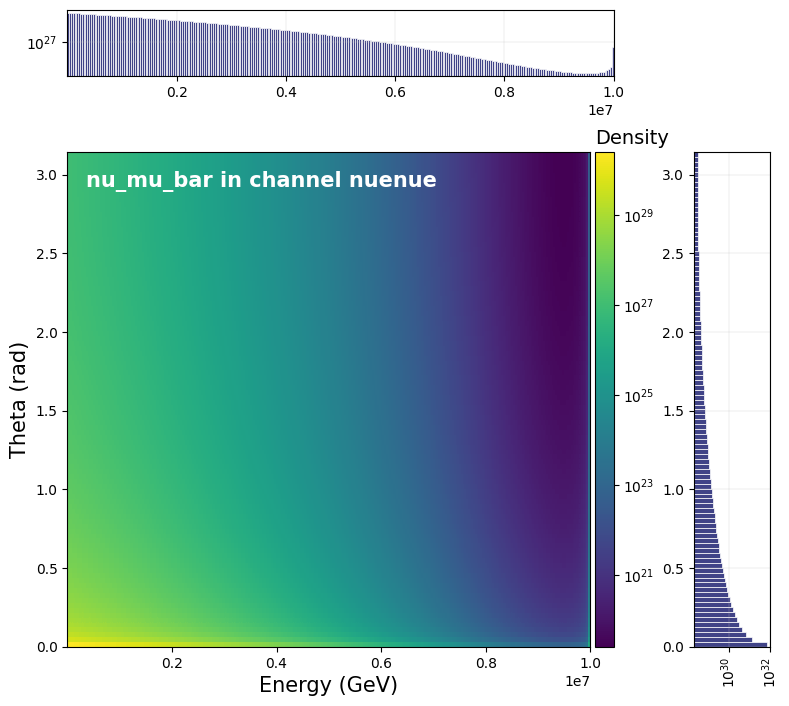

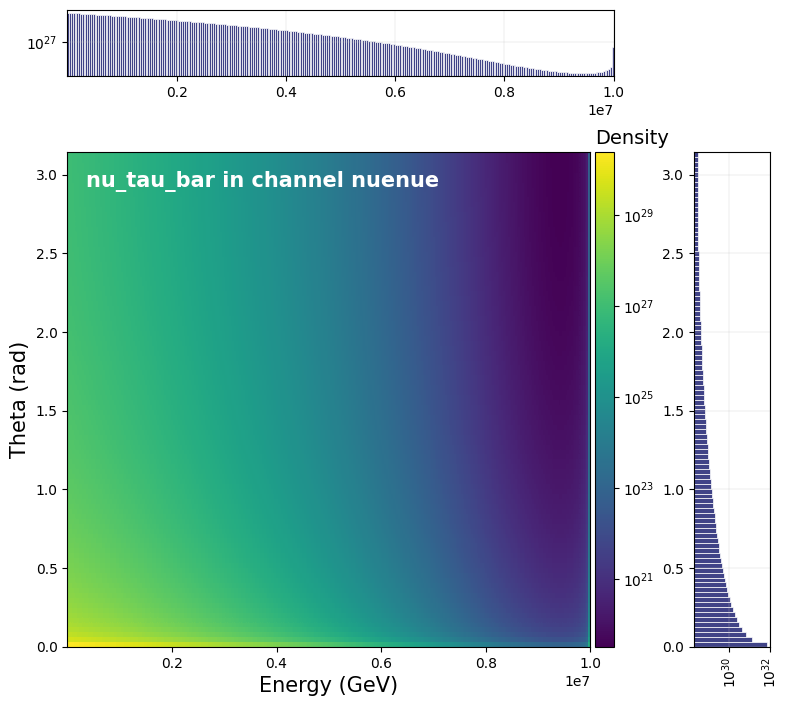

In [39]:
for i in range(len(nu_flavor)):
    plot_projections(True_flux_nue1[i],(mass_range_edges,theta_edges),'Energy (GeV)','Theta (rad)','{0} in channel nuenue'.format(nu_flavor[i]),zlogscale=True)

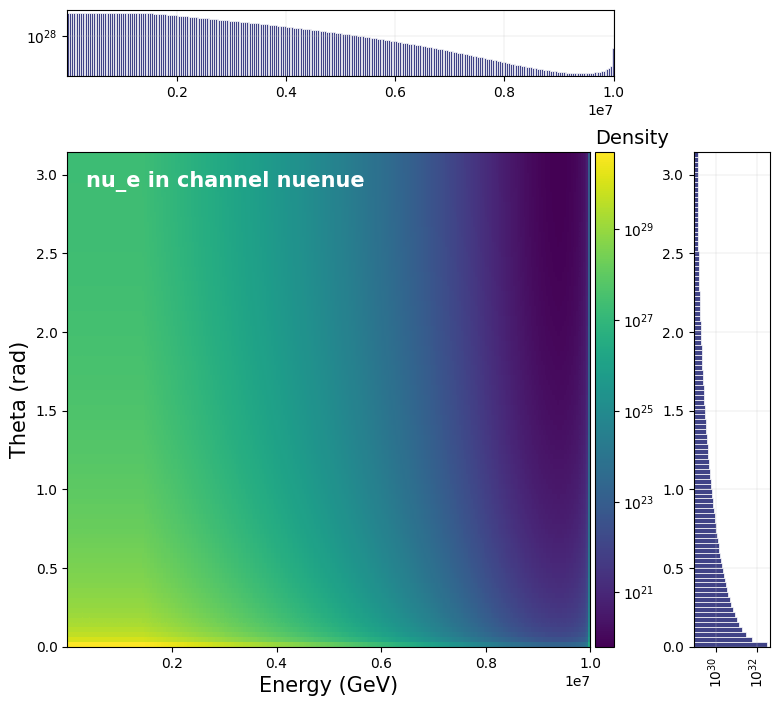

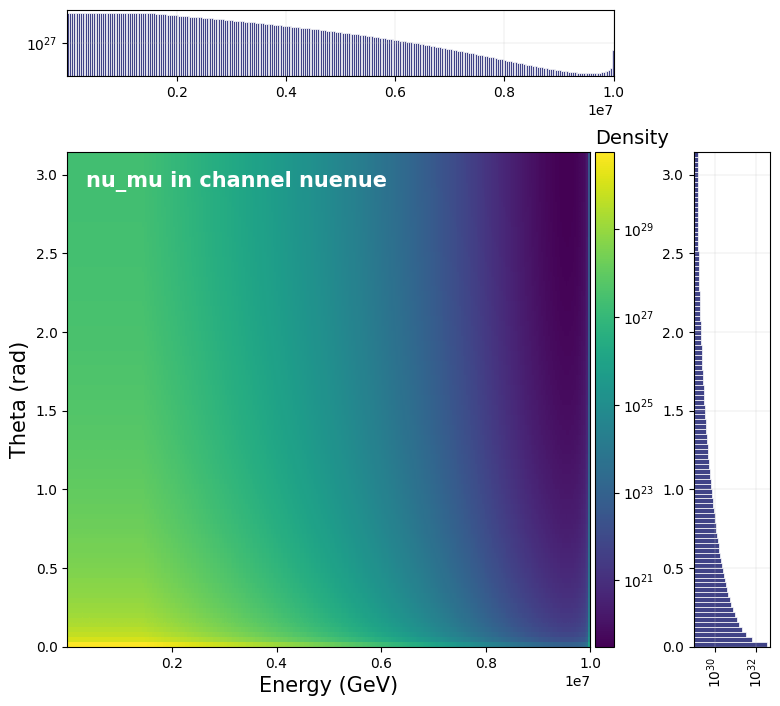

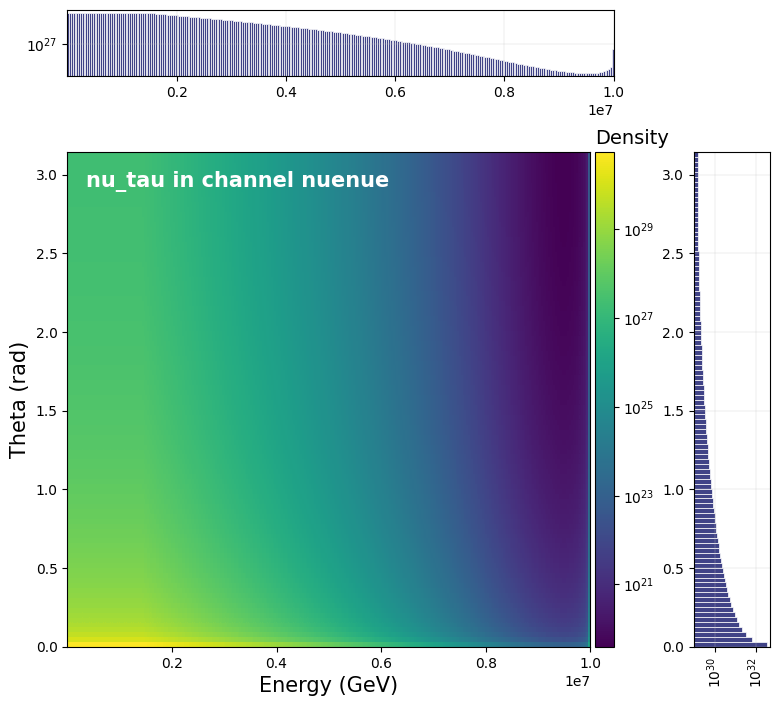

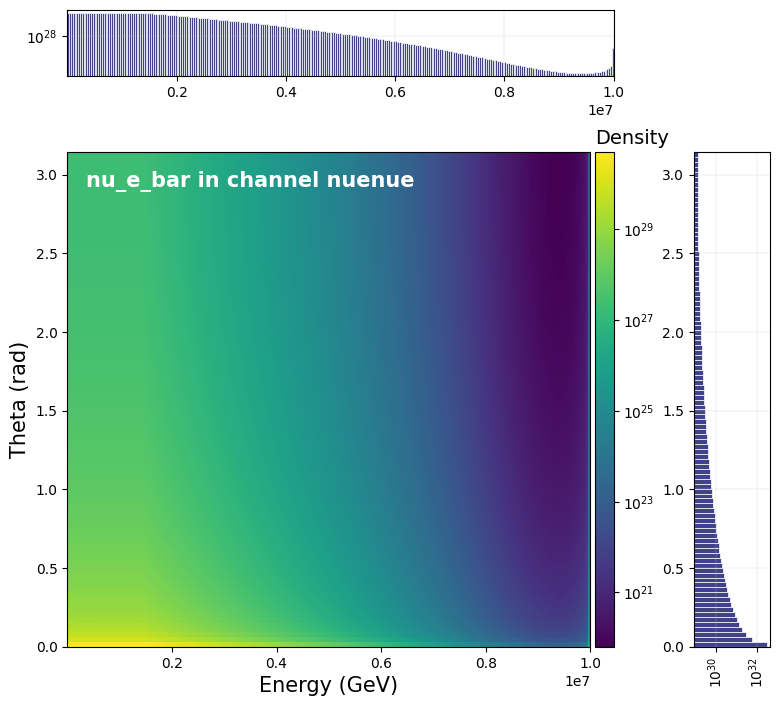

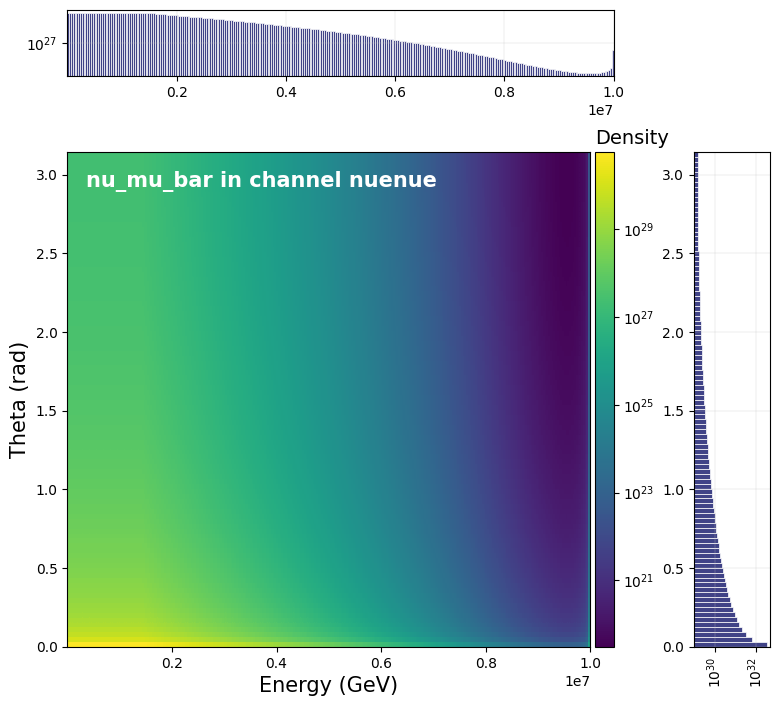

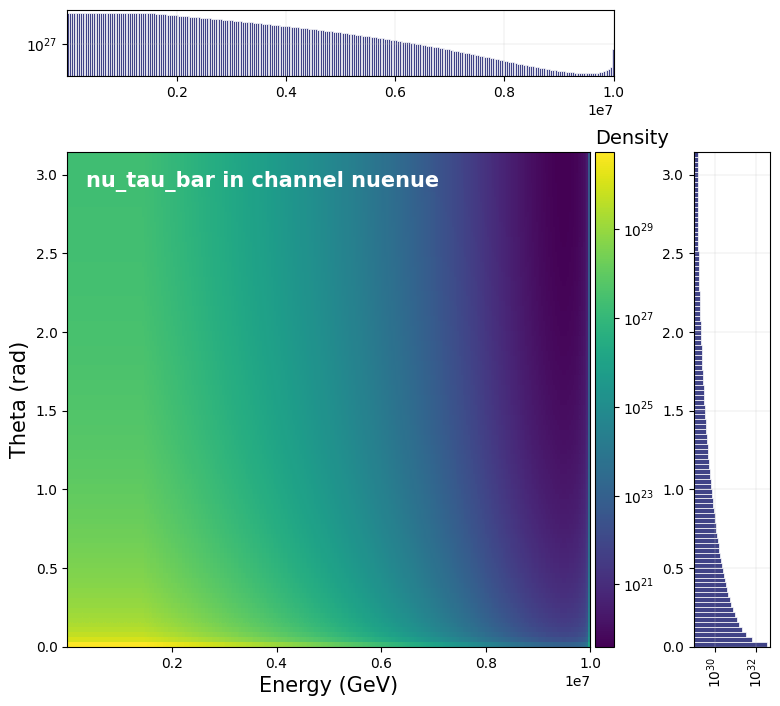

In [40]:
for i in range(len(nu_flavor)):
    plot_projections(True_flux_nue[i],(mass_range_edges,theta_edges),'Energy (GeV)','Theta (rad)','{0} in channel nuenue'.format(nu_flavor[i]),zlogscale=True)

In [41]:
#RespPdf.shape = (100, 300, 18, 50)
#True_Flux_nu = (300, 100)

## Expected signal distribution

Normalize RecoRate_nue and RecoRate_numu at the end to get pdf but the non-normalize part is using to compute cross-section

In [42]:
grid = np.meshgrid(True_psi_center, True_energy_center, Reco_psi_center, Reco_energy_center, indexing='ij')
RecoRate_nue = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
RecoRate_numu = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
RecoRate_nutau = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))

for i, nu_flavor in enumerate(Resp.keys()):
    TotalWeight = np.sum(Resp[nu_flavor])
    dRdlogE=Resp[nu_flavor]*grid[1]
    RespPdf = dRdlogE/np.sum(dRdlogE)
    RecoRate_nue += np.tensordot(RespPdf*TotalWeight, True_flux_nue[i], axes=([0,1], [1,0]))
    RecoRate_numu += np.tensordot(RespPdf*TotalWeight, True_flux_numu[i], axes=([0,1], [1,0]))
    RecoRate_nutau += np.tensordot(RespPdf*TotalWeight, True_flux_nutau[i], axes=([0,1], [1,0]))

In [43]:
grid = np.meshgrid(True_psi_center, True_energy_center, Reco_psi_center, Reco_energy_center, indexing='ij')
RecoRate_nue1 = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
RecoRate_numu1 = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
RecoRate_nutau1 = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))

for i, nu_flavor in enumerate(Resp.keys()):
    TotalWeight = np.sum(Resp[nu_flavor])
    dRdlogE=Resp[nu_flavor]*grid[1]
    RespPdf = dRdlogE/np.sum(dRdlogE)
    RecoRate_nue1 += np.tensordot(RespPdf*TotalWeight, True_flux_nue1[i], axes=([0,1], [1,0]))
    RecoRate_numu1 += np.tensordot(RespPdf*TotalWeight, True_flux_numu1[i], axes=([0,1], [1,0]))
    RecoRate_nutau1 += np.tensordot(RespPdf*TotalWeight, True_flux_nutau1[i], axes=([0,1], [1,0]))
    

In [44]:
Reco_mass_edges = np.log10(resp_matrix_data['Bin']['reco_energy_edges'])
Reco_theta_edges = resp_matrix_data['Bin']['reco_psi_edges']

Normal de ne rien voir à TeV (pas assez de flux ?) = OscNext sample (low E sample)

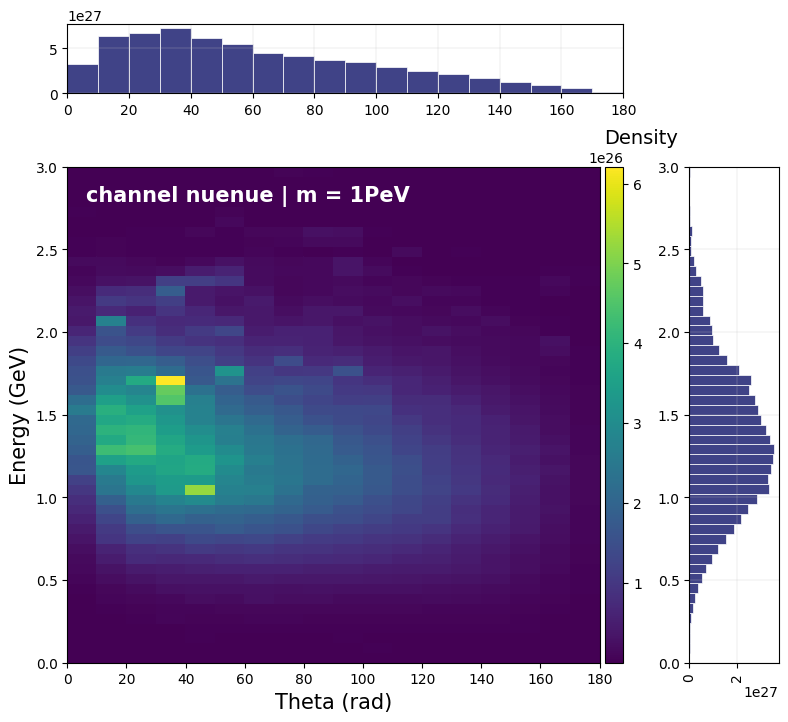

In [45]:
plot_projections(RecoRate_nue1,(Reco_theta_edges,Reco_mass_edges),'Theta (rad)','Energy (GeV)','channel nuenue | m = 1PeV')

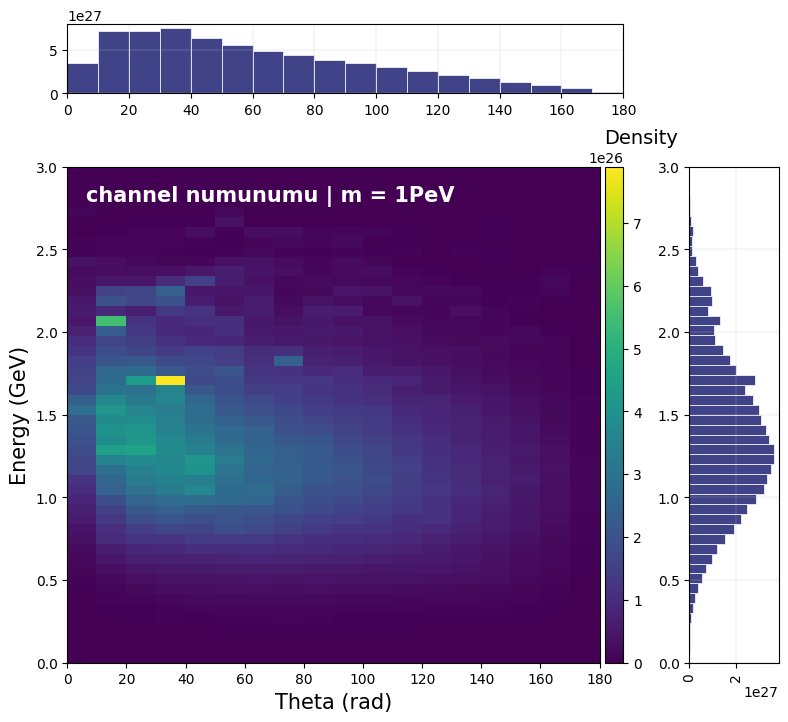

In [46]:
plot_projections(RecoRate_numu1,(Reco_theta_edges,Reco_mass_edges),'Theta (rad)','Energy (GeV)','channel numunumu | m = 1PeV')

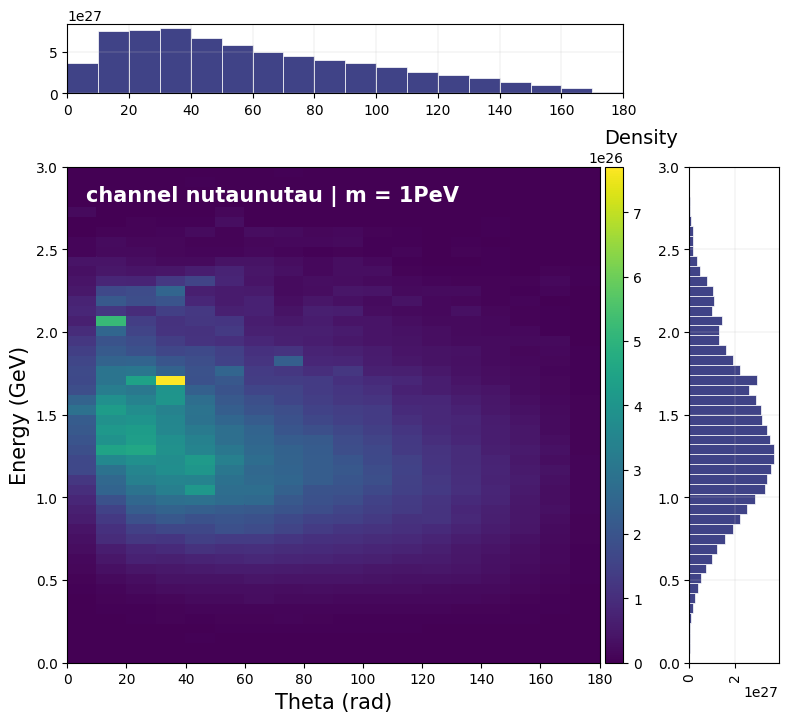

In [47]:
plot_projections(RecoRate_nutau1,(Reco_theta_edges,Reco_mass_edges),'Theta (rad)','Energy (GeV)','channel nutaunutau | m = 1PeV')

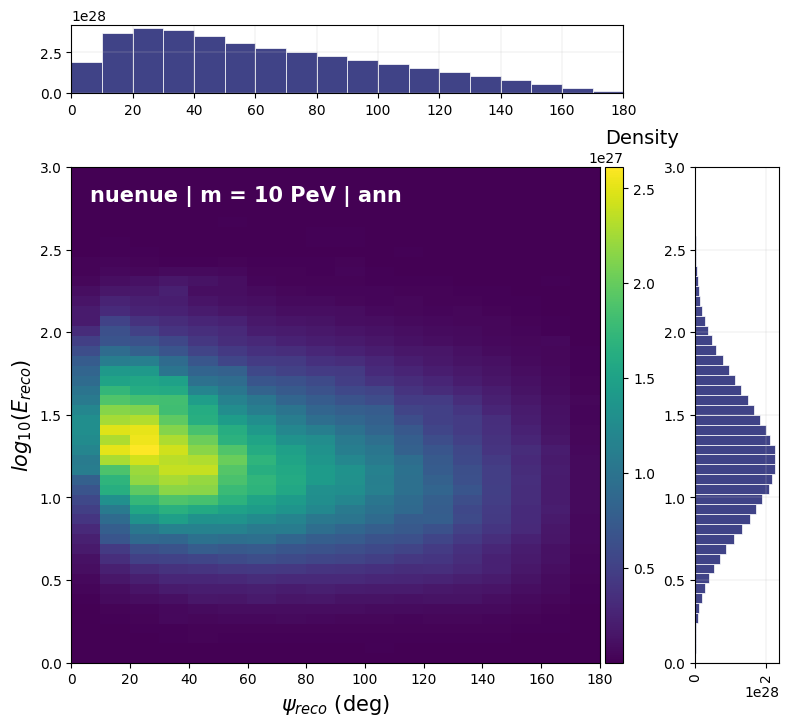

In [48]:
plot_projections(RecoRate_nue,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','nuenue | m = 10 PeV | ann')

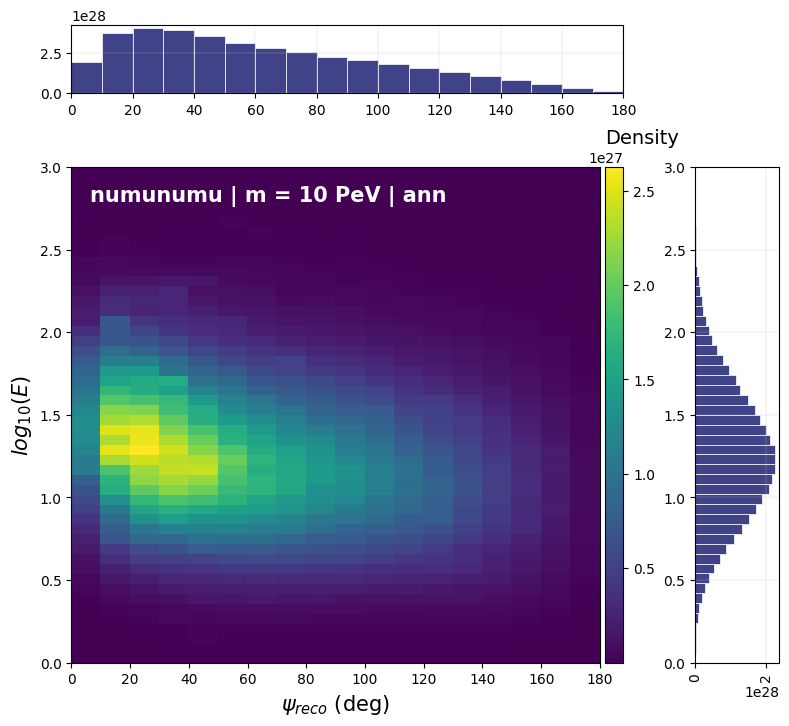

In [49]:
plot_projections(RecoRate_numu,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E)$','numunumu | m = 10 PeV | ann')

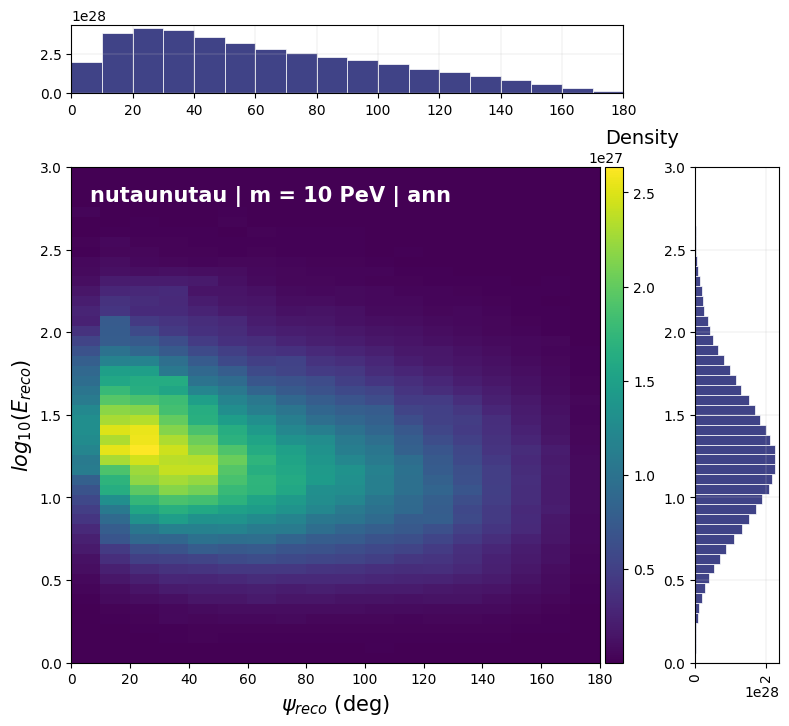

In [50]:
plot_projections(RecoRate_nutau,(Reco_theta_edges,Reco_mass_edges),'$\psi_{reco}$ (deg)','$log_{10}(E_{reco})$','nutaunutau | m = 10 PeV | ann')